# Module F: Numerical Differentiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_num_diff_smooth(x: np.array,
                       y: np.array,
                       n: int):

    if x.shape != y.shape:
        raise ValueError("x and y must be the same shape")

    # Initialize the derivative array
    y_smooth = np.zeros(x.shape[0] - 2*n)
    der = np.zeros(y_smooth.shape[0] - 2)

    # Smooth the data
    for i in range(n, y.shape[0] - n):
        _min = i - n
        _max = i + n
        y_smooth[_min] = np.mean(y[_min : _max])

    # Calculate the derivative
    _i = 0
    for i in range(1, y_smooth.shape[0] - 1):
        der[_i] = ((y_smooth[i+1] - y_smooth[i-1]) / (x[i+1] - x[i-1]))
        _i += 1

    return der, x[n+1:-n-1]

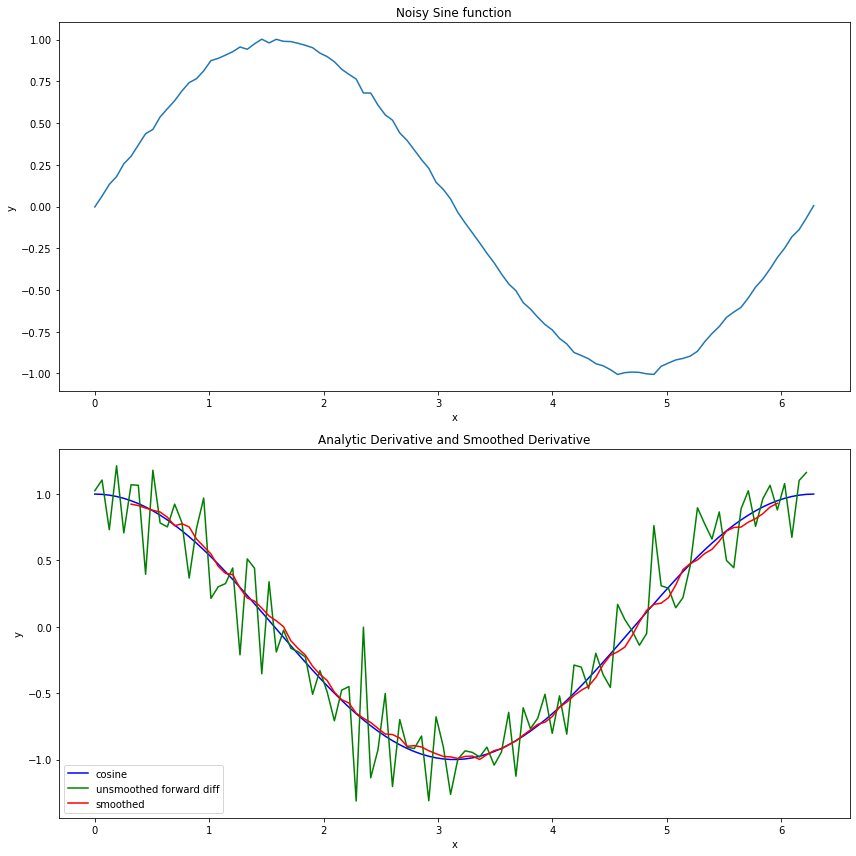

In [3]:
# Test my_num_diff_smooth
def test_my_num_diff_smooth():
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x) + np.random.randn(len(x))/100
    [dy, X] = my_num_diff_smooth(x, y, 4)
    plt.figure(figsize = (12, 12))
    plt.subplot(211)
    plt.plot(x, y)
    plt.title('Noisy Sine function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.subplot(212)

    plt.plot(x, np.cos(x), 'b', label = 'cosine')
    plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g',
             label = 'unsmoothed forward diff')
    plt.plot(X, dy, 'r', label = 'smoothed')
    plt.title('Analytic Derivative and Smoothed Derivative')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.tight_layout()
    plt.show()

test_my_num_diff_smooth()